In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Load DataBase From Path
df=pd.read_csv("delhiaqi.csv")
print(df.info())# For info about given data
df.head()  # Show Top 5 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null    float64
 8   nh3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB
None


,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


In [14]:
#For Season I will Covert Data in Date and month
df['date']=pd.to_datetime(df['date'])
df['month']=df['date'].dt.month
df['season']=df['month']%12 // 3 + 1   #Divided Months into season(3 months)
df.to_csv()    # Save A Changes that You Made
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'}#Deason Map
df['season'] = df['season'].map(season_map) 

In [3]:
print(df.describe())  # Statistical Analysis From Data

                      date            co          no         no2          o3  \
count                  561    561.000000  561.000000  561.000000  561.000000   
mean   2023-01-12 16:00:00   3814.942210   51.181979   75.292496   30.141943   
min    2023-01-01 00:00:00    654.220000    0.000000   13.370000    0.000000   
25%    2023-01-06 20:00:00   1708.980000    3.380000   44.550000    0.070000   
50%    2023-01-12 16:00:00   2590.180000   13.300000   63.750000   11.800000   
75%    2023-01-18 12:00:00   4432.680000   59.010000   97.330000   47.210000   
max    2023-01-24 08:00:00  16876.220000  425.580000  263.210000  164.510000   
std                    NaN   3227.744681   83.904476   42.473791   39.979405   

              so2        pm2_5         pm10         nh3  month  
count  561.000000   561.000000   561.000000  561.000000  561.0  
mean    64.655936   358.256364   420.988414   26.425062    1.0  
min      5.250000    60.100000    69.080000    0.630000    1.0  
25%     28.130000  

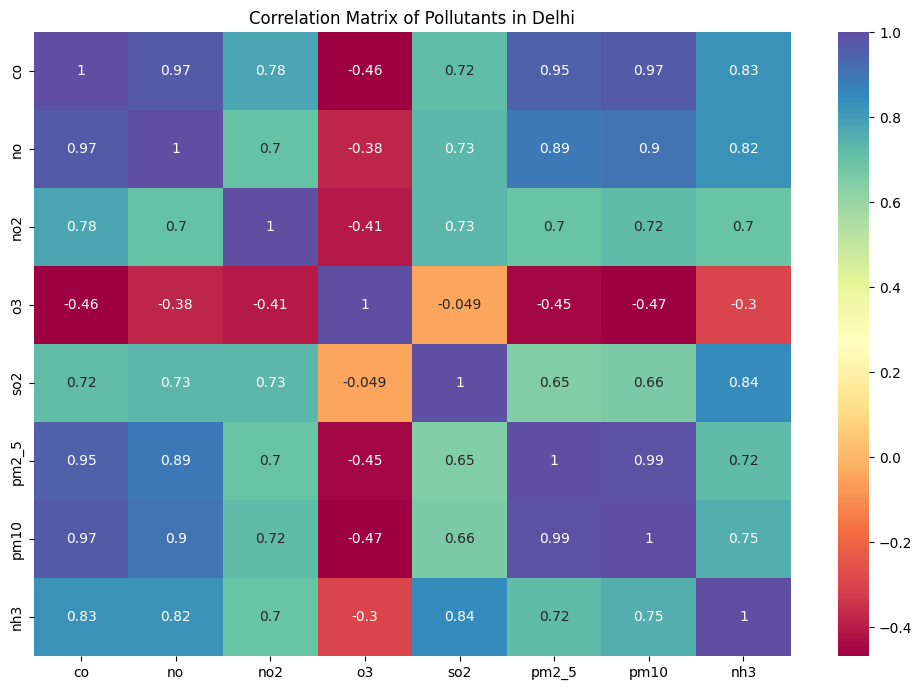

In [15]:
# Corelation Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(df.drop(columns=['month', 'season']).corr(numeric_only=True), annot=True, cmap="Spectral")
plt.title('Correlation Matrix of Pollutants in Delhi')
plt.tight_layout()
plt.show()

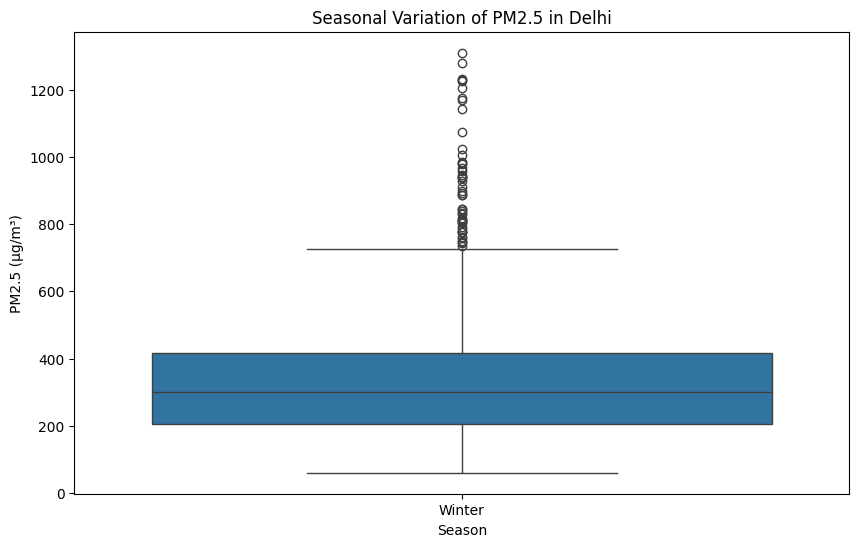

In [16]:
#  Seasonal Variation - PM2.5
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='pm2_5', data=df)
plt.title('Seasonal Variation of PM2.5 in Delhi')
plt.xlabel('Season')
plt.ylabel('PM2.5 (µg/m³)')
plt.show()

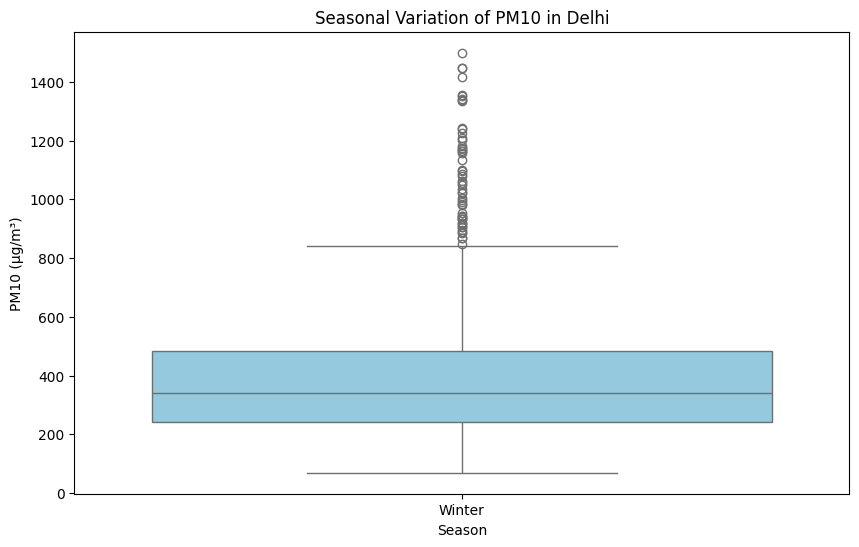

In [6]:
# Seasonal Variation - PM10
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='pm10', data=df, color="skyblue")
plt.title('Seasonal Variation of PM10 in Delhi')
plt.xlabel('Season')
plt.ylabel('PM10 (µg/m³)')
plt.show()


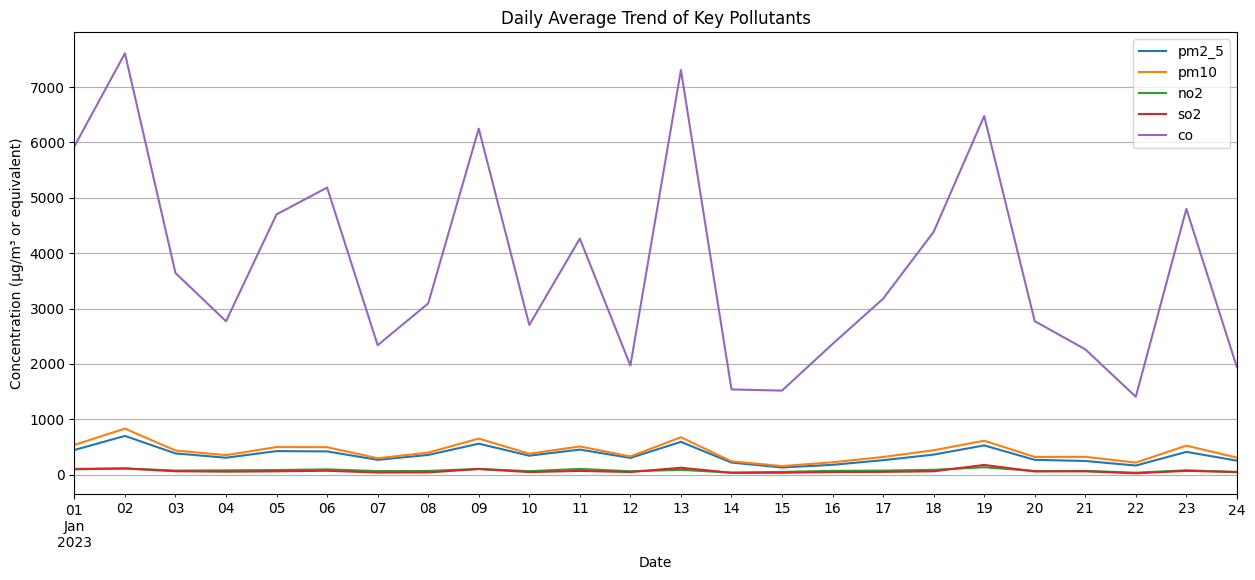

In [17]:
# Step 7: Daily Trend of Key Pollutants
pollutants = ['pm2_5', 'pm10', 'no2', 'so2', 'co']
df.set_index('date')[pollutants].resample('D').mean().plot(figsize=(15, 6))
plt.title('Daily Average Trend of Key Pollutants')
plt.ylabel('Concentration (µg/m³ or equivalent)')
plt.xlabel('Date')
plt.grid(True)
plt.show()

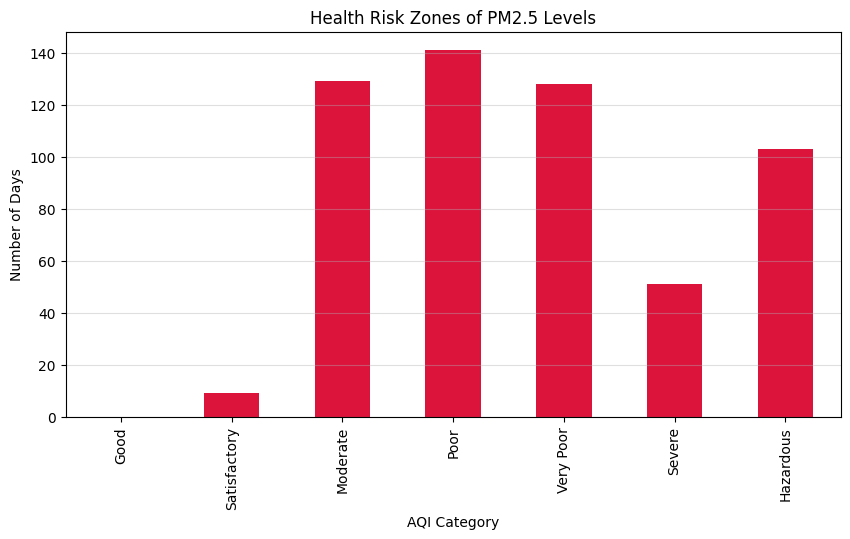

In [9]:
# Health Impact Zones based on PM2.5
df['pm25_category'] = pd.cut(df['pm2_5'],
                             bins=[0, 50, 100, 200, 300, 400, 500, np.inf],
                             labels=['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe', 'Hazardous'])

pm25_counts = df['pm25_category'].value_counts().sort_index()
pm25_counts.plot(kind='bar', figsize=(10, 5), color='crimson')
plt.title('Health Risk Zones of PM2.5 Levels')

plt.xlabel('AQI Category')
plt.ylabel('Number of Days')
plt.grid(axis='y',alpha=0.4)
plt.show()

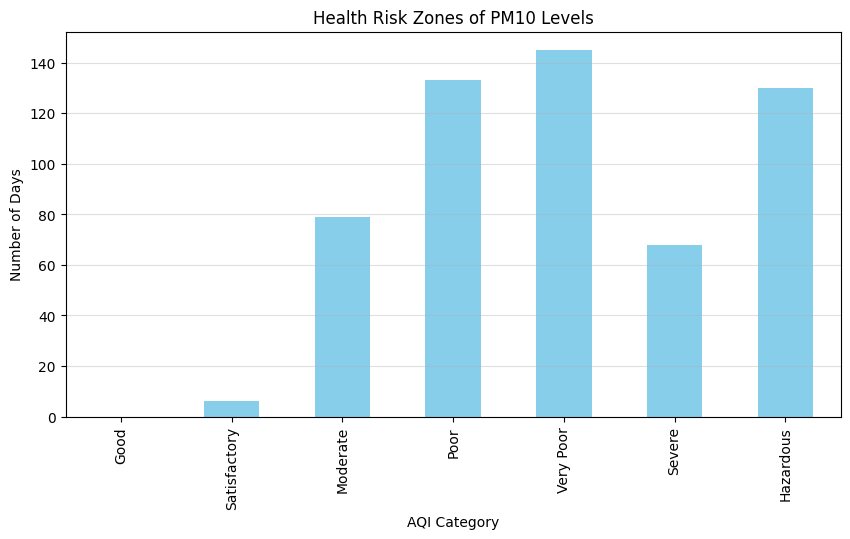

In [12]:
# Health Impact Zones based on PM10
df['pm10_category'] = pd.cut(df['pm10'],
                             bins=[0, 50, 100, 200, 300, 400, 500, np.inf],
                             labels=['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe', 'Hazardous'])

pm25_counts = df['pm10_category'].value_counts().sort_index()
pm25_counts.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Health Risk Zones of PM10 Levels')

plt.xlabel('AQI Category')
plt.ylabel('Number of Days')
plt.grid(axis='y',alpha=0.4)
plt.show()